<center>
    <h1>Linear Regression</h1>
    <h2>by Rebecca Hinrichs</h2>
    <h4>16 Feb 23</h4>
</center>

---
<h3>Part 1</h3><br>
(a) Notice that we used 100 epochs which was waste of time and we could have stopped earlier since after about epoch 55 or so, the loss is not getting lower significantly. Modify the above code so that if the change in loss is less than $1\%$, you exit the iterations.

In [1]:
# Import Libraries & Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# We have some warnings from scaling the X variables independently
import warnings
warnings.filterwarnings("ignore")

# Import Dataset
data = pd.read_csv("iris_dataset.csv")
data = data.iloc[:50][["sepal_length", "sepal_width"]]
data.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [2]:
# Define Simple Linear Regression Class with Gradient Descent and Early Stopping
class MyLinReg(object):
    """
    A class used to represent a single artificial neuron for linear regression. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def fit(self, X, y, alpha = 0.001, epochs = 10):
        self.theta = np.random.rand(X.shape[1] + 1)
        self.errors = []
        n = X.shape[0]

        for ea in range(epochs):
            errors = 0
            sum_1 = 0
            sum_2 = 0
            for xi, yi in zip(X, y):
                sum_1 += (self.predict(xi) - yi)*xi  # weight predictor
                sum_2 += (self.predict(xi) - yi)  # bias predictor
                errors += ((self.predict(xi) - yi)**2)  # residual: SSE
            self.theta[:-1] -= 2*alpha*sum_1/n  # weight update: L'/w'
            self.theta[-1] -= 2*alpha*sum_2/n  # bias update: L'/b'
            self.errors.append(errors/n)  # loss: MSE
            
            # EARLY STOPPING: exit iterative loop when RMSE is below the threshold of 1%
            if (ea > 0) and np.sqrt(abs(self.errors[ea]-self.errors[ea-1])/self.errors[ea-1]) < .01:
                print("Change in Loss is:",
                      np.sqrt(abs(self.errors[ea]-self.errors[ea-1])/self.errors[ea-1])*100,
                     "% ... exiting at iteration", ea)
                break
            
        return self

    def predict(self, X):
        weighted_sum = np.dot(X, self.theta[:-1]) + self.theta[-1]
        return self.activation_function(weighted_sum)

# Define Identity Function
def identity_function(z):
    return z

Change in Loss is: 0.9928999645180144 % ... exiting at iteration 22


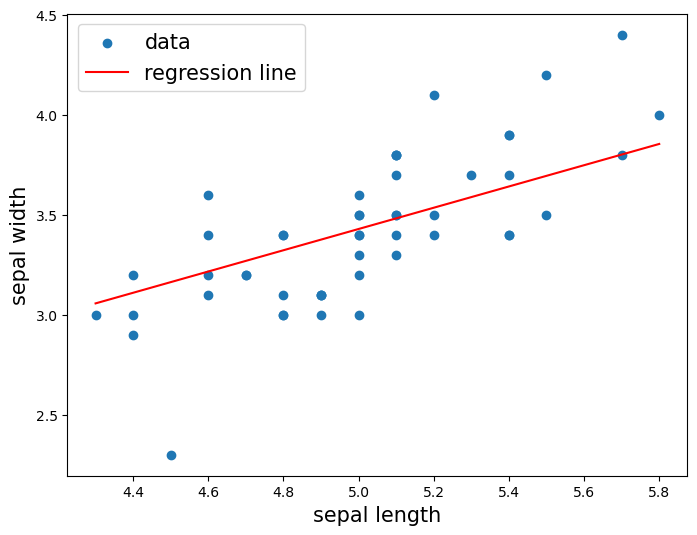

In [3]:
# Run Model
X = data[['sepal_length']].to_numpy()
y = data['sepal_width'].to_numpy()

# We instantiate an instance of MyLinReg class with identity activation function
model = MyLinReg(identity_function)
model.fit(X, y, alpha = 0.001, epochs = 100)

domain_x = np.linspace(np.min(X), np.max(X), 5)
domain_y = model.predict(domain_x.reshape(-1,1))
plt.figure(figsize = (8, 6))
plt.scatter(X, y, label = "data")
plt.plot(domain_x, domain_y, color="red", label ="regression line")
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("sepal width", fontsize = 15)
plt.legend(fontsize=15);

---

(b) The above class uses batch gradient descent to find the minimum of the loss function. Modify the original code and use the stochastic gradient descent instead. Iterate over many iterations and see how the RMSE changes. The graph of RMSE for the batch gradient descent is smooth and decreasing as the number of iterations increases. What can you say about the graph of RMSE when the stochastic gradient descent is used?  

In [6]:
# Define Simple Linear Regression Class with Stochastic Gradient Descent
class MySGDReg(object):
    """
    A class used to represent a single artificial neuron for linear regression. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def fit(self, X, y, alpha = 0.001, epochs = 10):
        self.theta = np.random.rand(X.shape[1] + 1)
        self.errors = []
        n = X.shape[0]
        batch_size = 2**5  # batch size of stochastic load

        for _ in range(epochs):
            errors = 0
            sum_1 = 0
            sum_2 = 0
            for _ in range(batch_size):
                random_index = np.random.randint(0, 50)
                sum_1 += (self.predict(X[random_index]) - y[random_index])*X[random_index]
                sum_2 += (self.predict(X[random_index]) - y[random_index])
                errors += ((self.predict(X[random_index]) - y[random_index])**2)
#                 if _ == (batch_size-1):
#                     print("batch size of stochastic load reached:", batch_size, "per epoch")
            self.theta[:-1] -= 2*alpha*sum_1/n
            self.theta[-1] -= 2*alpha*sum_2/n
            self.errors.append(errors/n)
            
        return self

    def predict(self, X):
        weighted_sum = np.dot(X, self.theta[:-1]) + self.theta[-1]
        return self.activation_function(weighted_sum)

# Define Identity Function
def identity_function(z):
    return z

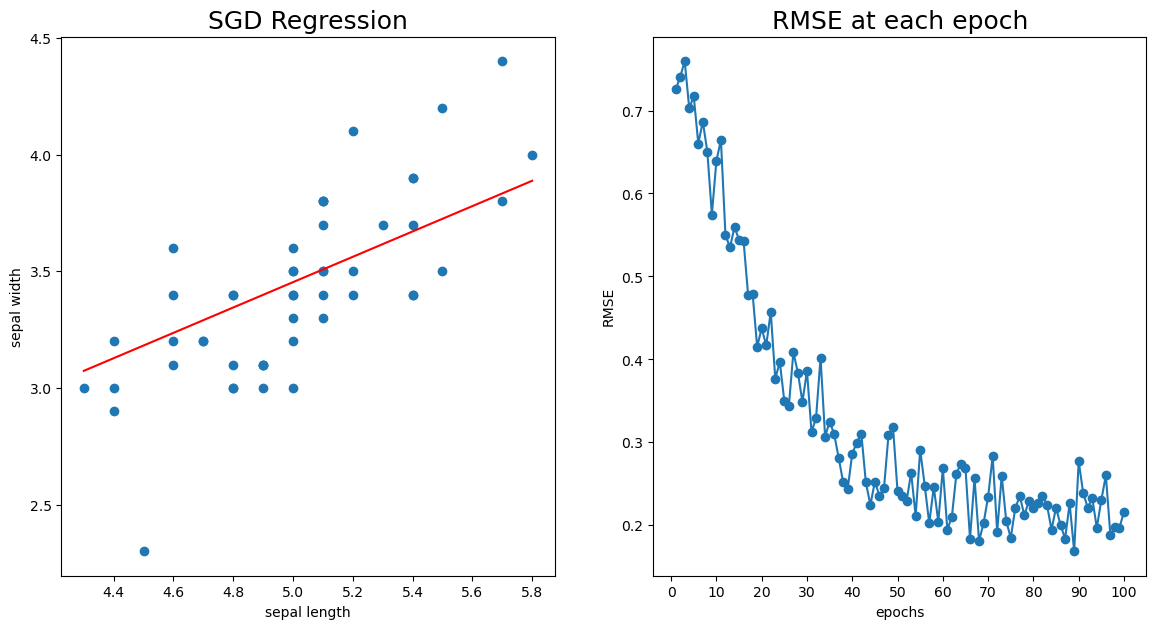

In [7]:
# Run Model
X = data[['sepal_length']].to_numpy()
y = data['sepal_width'].to_numpy()

# We instantiate an instance of MyLinReg class with identity activation function
model = MySGDReg(identity_function)
model.fit(X, y, alpha = 0.001, epochs = 100)

domain_x = np.linspace(np.min(X), np.max(X), 2)
domain_y = model.predict(domain_x.reshape(-1, 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.scatter(X, y)
ax1.plot(domain_x, domain_y, color = "red")
ax1.set_xlabel("sepal length")
ax1.set_ylabel("sepal width")
ax1.set_title("SGD Regression", fontsize = 18)

ax2.plot(range(1, len(model.errors) + 1), 
         np.sqrt(model.errors),
         marker = "o")
ax2.set_xlabel("epochs")
ax2.set_ylabel("RMSE")
ax2.set_xticks(range(0, len(model.errors) + 1, 10))
ax2.set_title("RMSE at each epoch", fontsize = 18);

Overall, the RMSE curve still descends, but its journey is staggered along the way.

---
### Part 2:

Try using ```sklearn SGDRegressor``` class instead of ```sklearn LinearRegression```. 

If the input variables are of different scales (here, ```TV``` and ```radio```), scaling those variables improves SGD convergence. Read about ```sklearn MinMaxScaler``` and try to see if using it will give better results.  

**<center>SGDRegressor**</center>

In [8]:
# Import Libraries & Dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Import Dataset
ads_data = pd.read_csv("advertising_dataset.csv")
ads_data = ads_data[["TV", "radio", "newspaper", "sales"]]
ads_data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
# We define the features and target variables
X = ads_data[['TV', 'radio']]
y = ads_data['sales']

In [10]:
# Then we split the training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now we can instantiate an instance of SGDRegressor class
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train, y_train)
w = sgd_reg.coef_
b = sgd_reg.intercept_
print("\nThe linear regression model based on the training data is \n")
print(f"predicted_sales = ({np.round(w[0],3)} * TV) + ({np.round(w[1],3)} * radio) + {np.round(b[0],3)}\n")


The linear regression model based on the training data is 

predicted_sales = (22072347573.316 * TV) + (148722921340.063 * radio) + 66301421215.296



In [11]:
# Calculate the MSE on the residuals
mse_train = mean_squared_error(y_train, sgd_reg.predict(X_train))
mse_test = mean_squared_error(y_test, sgd_reg.predict(X_test))

print(f"\nRMSE on the training data: {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test)}\n")


RMSE on the training data: 7607452824039.196

RMSE on the test data: 6886237026247.357



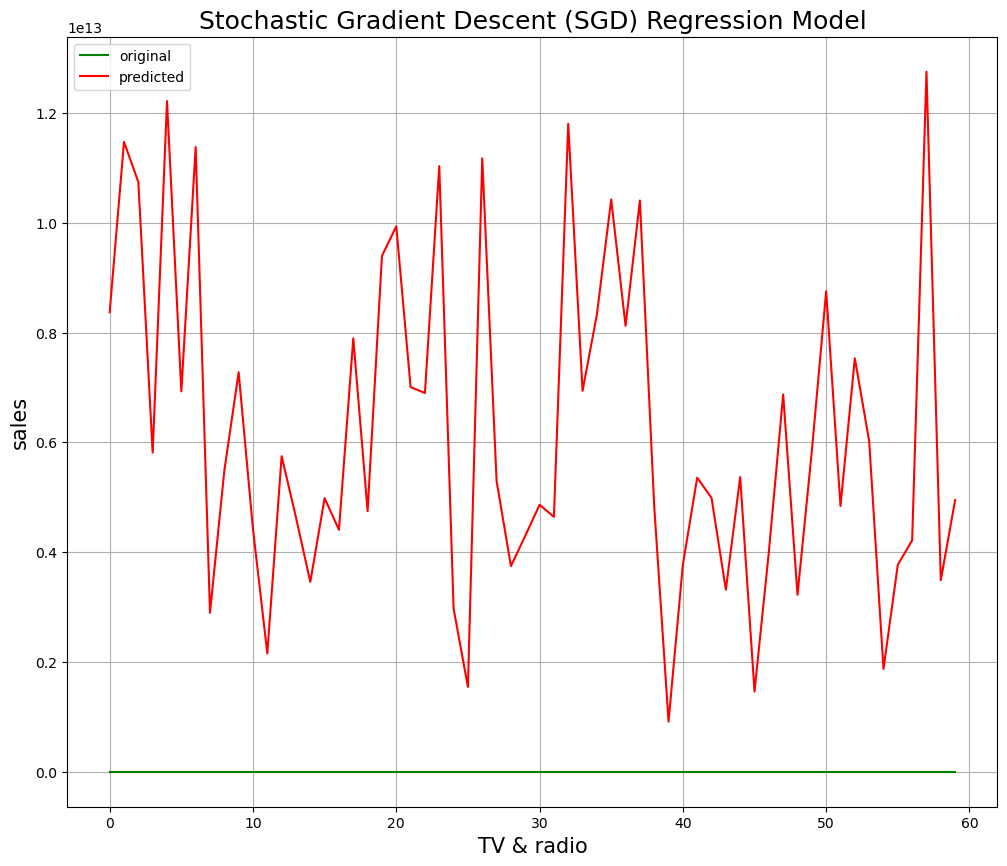

In [12]:
domain = range(len(y_test))
plt.figure(figsize = (12, 10))
plt.plot(domain, y_test, color='green', label='original')
plt.plot(domain, sgd_reg.predict(X_test), color='red', label='predicted')
plt.title('(unscaled) Stochastic Gradient Descent (SGD) Regression Model', fontsize=18)
plt.xlabel('TV & radio', fontsize=15)
plt.ylabel('sales', fontsize=15)
plt.legend()
plt.grid();

**<center>MinMaxScaler**</center>

In [13]:
# We define the features and target variables
X = ads_data[['TV', 'radio']]
y = ads_data['sales']

# We then scale the input data using MinMaxScaler
# We first tried all-X but returned slightly different coefficients than if we separated the features
# X = MinMaxScaler().fit_transform(X)

# We're ensuring each variable gets scaled independently
scaled_TV = MinMaxScaler().fit_transform(X[['TV']])
scaled_radio = MinMaxScaler().fit_transform(X[['radio']])
X[['TV']] = scaled_TV
X[['radio']] = scaled_radio

# Now we can check our work
print("\nScaled input terms are", scaled_TV.min(), "to", scaled_TV.max(), "for \'TV\'\n")
print("Scaled input terms are", scaled_radio.min(), "to", scaled_radio.max(), "for \'radio\'\n")
print("We can double-check quickly:\n", X.head(),"\n", X.tail())


Scaled input terms are 0.0 to 1.0 for 'TV'

Scaled input terms are 0.0 to 1.0 for 'radio'

We can double-check quickly:
          TV     radio
0  0.775786  0.762097
1  0.148123  0.792339
2  0.055800  0.925403
3  0.509976  0.832661
4  0.609063  0.217742 
            TV     radio
195  0.126818  0.074597
196  0.316199  0.098790
197  0.596212  0.187500
198  0.956713  0.846774
199  0.782550  0.173387


In [14]:
# Then we split the training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now we can instantiate an instance of SGDRegressor class
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train, y_train)
w = sgd_reg.coef_
b = sgd_reg.intercept_
print("\nThe linear regression model based on the training data is \n")
print(f"predicted_sales = ({np.round(w[0],3)} * TV) + ({np.round(w[1],3)} * radio) + {np.round(b[0],3)}\n")


The linear regression model based on the training data is 

predicted_sales = (11.912 * TV) + (9.327 * radio) + 3.856



In [15]:
# Calculate the MSE on the residuals
mse_train = mean_squared_error(y_train, sgd_reg.predict(X_train))
mse_test = mean_squared_error(y_test, sgd_reg.predict(X_test))

print(f"\nRMSE on the training data: {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test)}\n")


RMSE on the training data: 1.6293052956895093

RMSE on the test data: 1.9634692059841203



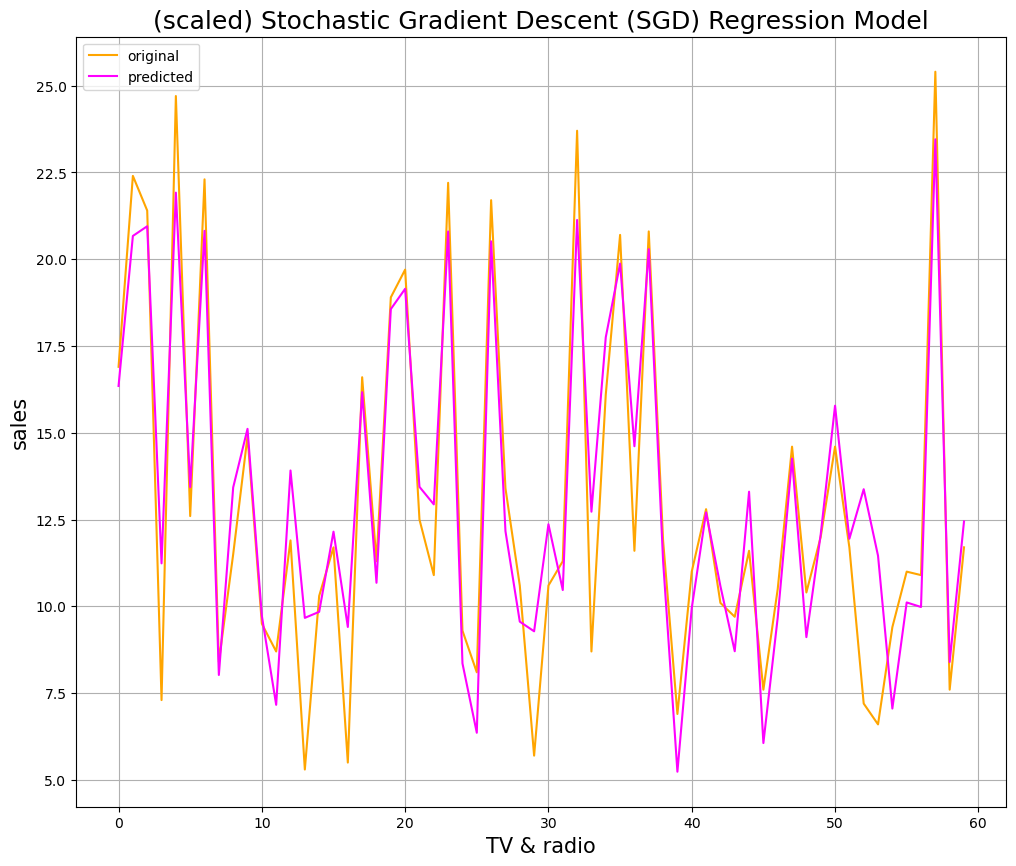

In [16]:
domain = range(len(y_test))
plt.figure(figsize = (12, 10))
plt.plot(domain, y_test, color='orange', label='original')
plt.plot(domain, sgd_reg.predict(X_test), color='magenta', label='predicted')
plt.title('(scaled) Stochastic Gradient Descent (SGD) Regression Model', fontsize=18)
plt.xlabel('TV & radio', fontsize=15)
plt.ylabel('sales', fontsize=15)
plt.legend()
plt.grid();

**<center>Conclusion:**</center>
Since the RMSE on the test data is not significantly higher than the RMSE on the training data, we can be assured that we are not overfitting the data.<br>
In addition, it appears the scaled data model gives a better performance than the unscaled model we tried previously.

---

### Part 3: 

Import the data file ```mtcars.csv```. The goal is
to determine two or three continuous numerical variables that can be used to predict mpg
(miles per gallon) using multiple linear regression. You can use ```sklearn``` or custom class; batch GD, SGD, or mini-batch SGD; 
and scaling. 

In [17]:
# Import Libraries & Dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, SplineTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Import Dataset
cars_data = pd.read_csv("mtcars.csv")
cars_data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [18]:
# We will add a filter to find the 3 most strongly-correlated variables compared to 'mpg'
cars_data.corr()[(abs(cars_data.corr()['mpg']) > .8) == True]['mpg']

mpg     1.000000
cyl    -0.852162
disp   -0.847551
wt     -0.867659
Name: mpg, dtype: float64

In [19]:
# Define the features and target variables using just our 4 variables of interest
X = cars_data[['cyl','disp','wt']]
y = cars_data['mpg']

# Next we'll ensure each variable gets scaled independently
X[['cyl']] = MinMaxScaler().fit_transform(X[['cyl']])
X[['disp']] = MinMaxScaler().fit_transform(X[['disp']])
X[['wt']] = MinMaxScaler().fit_transform(X[['wt']])
print("We'll double-check the scaling worked:\n", X.head(),"\n", X.tail())

We'll double-check the scaling worked:
    cyl      disp        wt
0  0.5  0.221751  0.283048
1  0.5  0.221751  0.348249
2  0.0  0.092043  0.206341
3  0.5  0.466201  0.435183
4  1.0  0.720629  0.492713 
     cyl      disp        wt
27  0.0  0.059865  0.000000
28  1.0  0.698179  0.423677
29  0.5  0.184335  0.321401
30  1.0  0.573460  0.525952
31  0.0  0.124470  0.323958


In [20]:
# Then we split the training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the prediction model using Multiple Linear Regression
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)
w = multi_reg.coef_
b = multi_reg.intercept_
print("\nThe multiple linear regression model based on the training data is \n")
print(f"h(x) = {np.round(w[0],5)}*x + {np.round(w[1],5)}*x^2 + {np.round(w[-1],5)}*x^{len(w)} + {np.round(b,5)}\n")

# Calculate the MSE on the residuals
mse_train = mean_squared_error(y_train, multi_reg.predict(X_train))
mse_test = mean_squared_error(y_test, multi_reg.predict(X_test))
print(f"RMSE on the training data: {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test)}\n")


The multiple linear regression model based on the training data is 

h(x) = -6.36236*x + 1.10331*x^2 + -13.012*x^3 + 28.54775

RMSE on the training data: 2.437173010288123

RMSE on the test data: 2.470631744745403



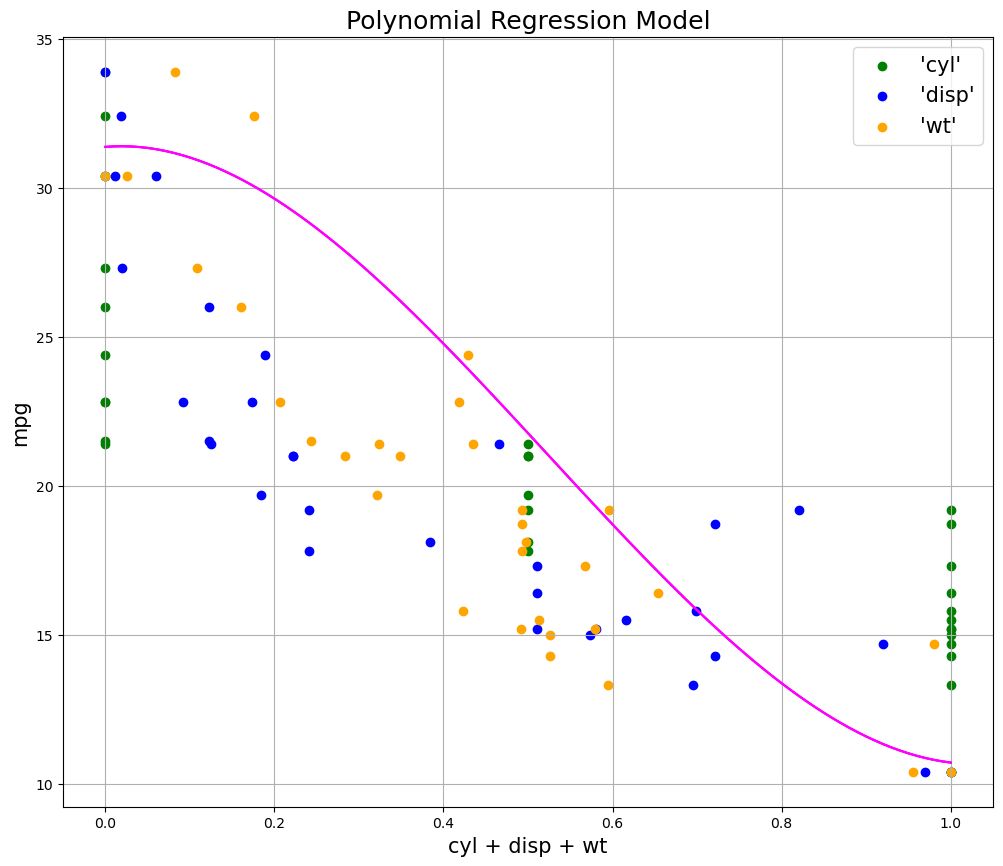

In [24]:
# Demonstrate the polynomial nature of the data points (>deg.3 looked bad!)
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
domain_x = np.linspace(X.min(), X.max(), 100)
domain_y = model.predict(poly_features.fit_transform(domain_x))
plt.figure(figsize = (12, 10))
plt.scatter(X[['cyl']], y, color='green', label='\'cyl\'')
plt.scatter(X[['disp']], y, color='blue', label='\'disp\'')
plt.scatter(X[['wt']], y, color='orange', label='\'wt\'')
plt.plot(domain_x, domain_y, color='magenta')
plt.title('Polynomial Regression Model', fontsize=18)
plt.xlabel('cyl + disp + wt', fontsize=15)
plt.ylabel('mpg', fontsize=15)
plt.legend(fontsize=15)
plt.grid();

**<center>Conclusion:**</center>
It appears evident that, based on our plot of the data points, we have a Polynomial (Multiple) Regression Model, so our choice of model was the best fit. This was confirmed by our very small disparity in RMSE between the training and testing data sets. Our model shows a strong negative correlation between response `mpg` and variables `cyl`, `disp` and `wt`, indicating that for an increase of any of the three variables, and multiplicatively when in conjunction, we have a predictable decrease in `mpg`.

---

### Part 4:  

Read about Probabilistic Interpretation of Linear Regression -- reference [1] in lecture notes, pages 11-13.

Done!